Давыдов ПИм-231 лаба 17 ммо

Для анализа используем файл disasters_social_media.csv,
который загрузим в googleColab с помощью программного **кода**

In [ ]:
# Загрузить любой файл с компьютера в google.colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
 print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving disasters_social_media.csv to disasters_social_media.csv
User uploaded file "disasters_social_media.csv" with length 2208398 bytes


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_raw = pd.read_csv('disasters_social_media.csv', encoding='latin-1') # Чтение данных
df_raw

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,778261105,True,golden,100,NaN,Relevant,0.7629,Relevant,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,5675678.0,NaN
10872,778261106,True,golden,90,NaN,Relevant,0.9203,Relevant,NaN,NaN,Police investigating after an e-bike collided ...,4234.0,NaN
10873,778261107,True,golden,102,NaN,Relevant,1.0000,Relevant,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,3242.0,NaN
10874,778261108,True,golden,96,NaN,Relevant,0.8419,Relevant,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,457.0,NaN


In [ ]:
pd.read_csv('disasters_social_media.csv', nrows=1, encoding='latin-1').columns.tolist()


['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'choose_one',
 'choose_one:confidence',
 'choose_one_gold',
 'keyword',
 'location',
 'text',
 'tweetid',
 'userid']

In [ ]:
df_raw.choose_one.values

array(['Relevant', 'Relevant', 'Relevant', ..., 'Relevant', 'Relevant',
       'Relevant'], dtype=object)

In [ ]:
set(df_raw.choose_one.values)


{"Can't Decide", 'Not Relevant', 'Relevant'}

Задача: Требуется по имеющейся таблице научиться по новому объекту,
которого нет в таблице, но для которого известны значения входных признаков,
по возможности с небольшой ошибкой предсказывать значение выделенного
признака (ответа).

Если ответ количественный, то задача называется задачей восстановления
регрессии. Если ответ категориальный, то задача называется задачей
классификации.

Нас интересует только предсказание «релевантный» или «не
релевантный» твит, поэтому удалим строки 'Can't decide' ('Не могу
решить'):


In [ ]:
df = df_raw[df_raw.choose_one != "Can't Decide"]
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,778261105,True,golden,100,NaN,Relevant,0.7629,Relevant,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,5675678.0,NaN
10872,778261106,True,golden,90,NaN,Relevant,0.9203,Relevant,NaN,NaN,Police investigating after an e-bike collided ...,4234.0,NaN
10873,778261107,True,golden,102,NaN,Relevant,1.0000,Relevant,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,3242.0,NaN
10874,778261108,True,golden,96,NaN,Relevant,0.8419,Relevant,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,457.0,NaN


Теперь сосредоточимся только на столбцах 'text' и 'choose_one',
сократив тем самым количество столбцов с 13 до 2

In [ ]:
df = df[['text','choose_one']] # берем только столбцы 'text' и 'choose_one'
df

,text,choose_one
0,Just happened a terrible car crash,Relevant
1,Our Deeds are the Reason of this #earthquake M...,Relevant
2,"Heard about #earthquake is different cities, s...",Relevant
3,"there is a forest fire at spot pond, geese are...",Relevant
4,Forest fire near La Ronge Sask. Canada,Relevant
...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant
10872,Police investigating after an e-bike collided ...,Relevant
10873,The Latest: More Homes Razed by Northern Calif...,Relevant
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant


Преобразуем категориальные признаки в количественные. Перейдем от
текстовых данных: 'Relevant' и 'Not Relevant' к числовым бинарным данным.
Закодируем числом 1 релевантные твиты и 0 – нерелевантные.

In [ ]:
relevance = {'Relevant':1,'Not Relevant':0}
df['relevance'] = df.choose_one.map(relevance)

<ipython-input-9-ec41fafa72b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relevance'] = df.choose_one.map(relevance)


In [ ]:
df

,text,choose_one,relevance
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1


In [ ]:
def extract_words(sentence):
  ignore_words = stopwords.words()
  words = re.sub("[^\w]", " ", sentence).split() # заменяет все специальные символы на ' '
  words = [word.lower() for word in words]
  words_cleaned = [w.lower() for w in words if w not in ignore_words]
  return words_cleaned

In [ ]:
# вычисляет частоту появления слов
def map_book(hash_map, tokens):
  if tokens is not None:
    for word in tokens:
  # слово присутствует
      if word in hash_map:
        hash_map[word] = hash_map[word] + 1
      else:
        hash_map[word] = 1
    return hash_map
  else:
    return None

In [ ]:
def make_hash_map(df):
  hash_map = {}
  for index, row in df.iterrows():
    hash_map = map_book(hash_map, extract_words(row['text']))
  return hash_map

In [ ]:
# определяет функцию frequent_vocab следующими входными данными: word_freq и max_features
def frequent_vocab(word_freq, max_features):
  counter = 0 # инициализирует счетчик значением ноль
  vocab = [] # создает пустой список, который называется vocab
# перечисляет слова в словаре в порядке убывания частоты
  for key, value in sorted(word_freq.items(), key=lambda item: (item[1], item[0]), reverse=True):
# функция цикла для получения топ (max_features) количества слов
    if counter < max_features:
      vocab.append(key)
      counter+=1
    else: break
  return vocab

In [ ]:
hash_map = make_hash_map(df) # создает hash map (слово-частота) из токенизированного набора данных
vocab = frequent_vocab(hash_map, 500)
vocab

['co',
 'http',
 'https',
 'û_',
 'amp',
 'fire',
 '2',
 'news',
 'emergency',
 'video',
 'disaster',
 '3',
 'police',
 'body',
 'suicide',
 '1',
 'storm',
 'time',
 'burning',
 'crash',
 'rt',
 'attack',
 'back',
 'california',
 'day',
 'fires',
 'buildings',
 'today',
 'world',
 'nuclear',
 'bomb',
 'love',
 'hiroshima',
 'year',
 'full',
 '5',
 'û',
 'dead',
 'youtube',
 'life',
 'watch',
 'car',
 'killed',
 'train',
 '4',
 'ûªs',
 'accident',
 'make',
 'gt',
 '2015',
 'w',
 'families',
 'years',
 'mass',
 'bombing',
 'collapse',
 'home',
 'water',
 'forest',
 'death',
 'army',
 'work',
 'black',
 'wildfire',
 'hot',
 'god',
 'read',
 'mh370',
 'bomber',
 'fatal',
 'live',
 'northern',
 'obama',
 '8',
 'pm',
 'japan',
 '11',
 'school',
 'feel',
 'city',
 'wild',
 'flood',
 'reddit',
 'great',
 '9',
 'stop',
 'night',
 'shit',
 'latest',
 'injured',
 '6',
 'typhoon',
 'top',
 'homes',
 'services',
 'floods',
 'hope',
 'fear',
 'legionnaires',
 'atomic',
 'house',
 'flames',
 '10',
 '

In [ ]:
# Определяем функцию bagofwords со следующими входными данными: sentence и words
def bagofwords(sentence, words):
  sentence_words = extract_words(sentence) #токенизирует предложения/твиты и присваивает их значение переменной sentence_words
# подсчитывает частоту появления слова
  bag = np.zeros(len(words)) #создает массив NumPy, состоящий из нулей с размером len(words)
# Циклически перебираем данные и добавляем значение 1, когда токен присутствует в твите
  for sw in sentence_words:
    for i,word in enumerate(words):
      if word == sw:
        bag[i] += 1
  return np.array(bag) # возвращает мешок слов для одного твита


In [ ]:
# настройте массив NumPy с заданным размером для хранения мешка слов
n_words = len(vocab)
n_docs = len(df)
bag_o = np.zeros([n_docs,n_words])
# используйте цикл, чтобы добавить новую строку для каждого твита
for ii in range(n_docs):
# вызывает предыдущую функцию 'bagofwords'. Обратите внимание навходные данные: sentence и words
  bag_o[ii,:] = bagofwords(df['text'].iloc[ii], vocab)
bag_o.shape

(10860, 500)

2 часть

In [ ]:
sorted(hash_map.items(), key=lambda item: item[1], reverse=True)[:20]


[('co', 6800),
 ('http', 6154),
 ('https', 618),
 ('û_', 514),
 ('amp', 510),
 ('fire', 365),
 ('2', 310),
 ('news', 288),
 ('emergency', 229),
 ('video', 227),
 ('disaster', 220),
 ('3', 202),
 ('police', 199),
 ('body', 178),
 ('suicide', 177),
 ('1', 176),
 ('storm', 170),
 ('time', 167),
 ('burning', 167),
 ('crash', 166)]

In [ ]:
#инициализируйте 2 переменные, представляющие количество твитов (numdocs) и количество токенов/слов (numwords)
numdocs, numwords = np.shape(bag_o)
#Переход к формуле tfidf, как указано выше
N = numdocs
word_frequency = np.empty(numwords)
#Подсчет количества документов, в которых появляется слово
for word in range(numwords):
  word_frequency[word]=np.sum((bag_o[:,word]>0))
idf = np.log(N/word_frequency)
idf.shape
idf

array([0.64339282, 0.74842242, 2.87774463, 3.07225142, 3.18581871,
       3.47871106, 3.65448692, 3.67244073, 3.88566982, 3.91294424,
       4.02498343, 4.05109458, 4.08883491, 4.1223576 , 4.18085381,
       4.14534712, 4.18085381, 4.19297517, 4.19909139, 4.25588899,
       4.20524526, 4.2822063 , 4.26240367, 4.24298559, 4.28889529,
       4.26240367, 4.28889529, 4.31610785, 4.32302829, 4.33701454,
       4.31610785, 4.38756682, 4.37286067, 4.44081133, 4.32999696,
       4.41003967, 4.44865451, 4.40249247, 4.38756682, 4.41764427,
       4.41764427, 4.45655969, 4.46452786, 4.52215697, 4.46452786,
       4.5137181 , 4.46452786, 4.50534985, 5.07333389, 4.5392514 ,
       4.56545377, 4.91081496, 4.62001276, 4.6294025 , 4.6294025 ,
       4.6294025 , 4.63888124, 4.66786878, 4.67772108, 4.64845069,
       4.68767141, 4.68767141, 4.74954681, 4.70787411, 4.7284934 ,
       4.74954681, 4.7389647 , 4.7602421 , 4.78198209, 4.77105302,
       4.82693347, 4.80420522, 5.16570721, 4.82693347, 4.88612

In [ ]:
#инициализирует массив tfidf
tfidf = np.empty([numdocs, numwords])
#циклически перебирает твиты, перемножая частоту появления слов (представленную мешком слов) с idf
for doc in range(numdocs):
  tfidf[doc, :]=bag_o[doc, :]*idf
tfidf.shape
tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64339282, 0.74842242, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64339282, 0.74842242, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf,df['relevance'].values, shuffle=True)

In [ ]:
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

8145 2715


In [ ]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1557
           1       0.78      0.68      0.73      1158

    accuracy                           0.78      2715
   macro avg       0.78      0.77      0.77      2715
weighted avg       0.78      0.78      0.78      2715



Попробуем всякие разные модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Random Forest\n", report)

Random Forest
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      1557
           1       0.75      0.69      0.72      1158

    accuracy                           0.77      2715
   macro avg       0.77      0.76      0.76      2715
weighted avg       0.77      0.77      0.77      2715



In [ ]:
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 75, 90, 100, 125, 150, 175, 200],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'max_depth': 10, 'n_estimators': 150}


In [ ]:
best_model = RandomForestClassifier(n_estimators=150, max_depth=10)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

In [ ]:
predictions = best_model.predict(X_test)
report = classification_report(y_test, predictions)
print("Random Forest с лучшими значениями\n", report)

Random Forest с лучшими значениями
               precision    recall  f1-score   support

           0       0.68      0.97      0.80      1557
           1       0.90      0.37      0.53      1158

    accuracy                           0.72      2715
   macro avg       0.79      0.67      0.66      2715
weighted avg       0.77      0.72      0.68      2715



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

In [ ]:
y_train = utils.to_categorical(y_train, 2)
y_test = utils.to_categorical(y_test, 2)

In [ ]:
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(4000, input_dim=500, activation="relu")) # Входной полносвязный слой
model.add(Dense(4000, input_dim=4000, activation="relu")) # 1 скрытый слой
model.add(Dense(4000, input_dim=4000, activation="relu")) # 2 скрытый слой
model.add(Dense(2000, input_dim=4000, activation="relu")) # 3 скрытый слой
model.add(Dense(2000, input_dim=2000, activation="relu")) # 4 скрытый слой
model.add(Dense(2, activation="softmax")) # Выходной полносвязный слой

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4000)              2004000   
                                                                 
 dense_13 (Dense)            (None, 4000)              16004000  
                                                                 
 dense_14 (Dense)            (None, 4000)              16004000  
                                                                 
 dense_15 (Dense)            (None, 2000)              8002000   
                                                                 
 dense_16 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_17 (Dense)            (None, 2)                 4002      
                                                                 
Total params: 46020002 (175.55 MB)
Trainable params: 4

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=1)

Epoch 1/100
66/66 [==============================] - 4s 25ms/step - loss: 0.6651 - accuracy: 0.7079 - val_loss: 0.5230 - val_accuracy: 0.7698
Epoch 2/100
66/66 [==============================] - 1s 22ms/step - loss: 0.4212 - accuracy: 0.8181 - val_loss: 0.4900 - val_accuracy: 0.7901
Epoch 3/100
66/66 [==============================] - 1s 23ms/step - loss: 0.3548 - accuracy: 0.8502 - val_loss: 0.4981 - val_accuracy: 0.7876
Epoch 4/100
66/66 [==============================] - 1s 22ms/step - loss: 0.3034 - accuracy: 0.8734 - val_loss: 0.5840 - val_accuracy: 0.7808
Epoch 5/100
66/66 [==============================] - 1s 23ms/step - loss: 0.2632 - accuracy: 0.8895 - val_loss: 0.6855 - val_accuracy: 0.7772
Epoch 6/100
66/66 [==============================] - 1s 23ms/step - loss: 0.2265 - accuracy: 0.9078 - val_loss: 0.5897 - val_accuracy: 0.7821
Epoch 7/100
66/66 [==============================] - 2s 24ms/step - loss: 0.2006 - accuracy: 0.9157 - val_loss: 0.8593 - val_accuracy: 0.7747
Epoch 

In [ ]:
import matplotlib.pyplot as plt

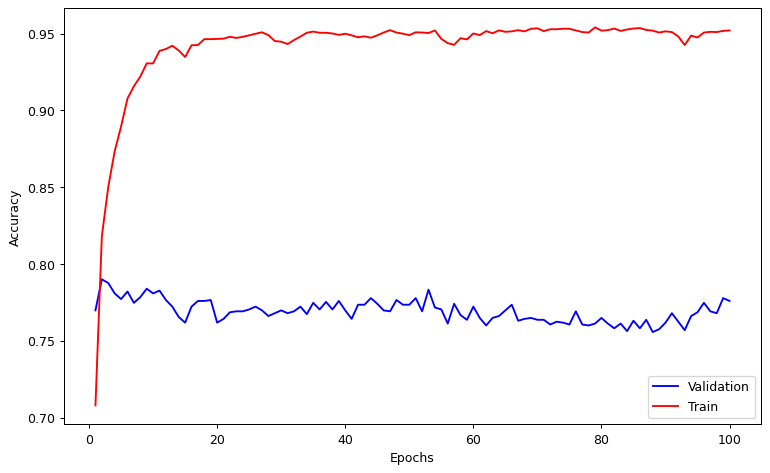

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Не получилось добиться 90%.